In [1]:
import sys
sys.path.insert(0, "/home/iheredia/ignacio/covid/covid-dl/src")
import pandas as pd
from plotly import colors
import plotly.graph_objects as go

from paths import PATHS
from data.base import get_data



In [2]:
# Load data
df = get_data(trend=False, labels=False)
X = df.set_index(['date', 'province'])

pred = pd.read_csv(PATHS.outdir / 'predictions.csv', index_col=[0, 1])

/home/iheredia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


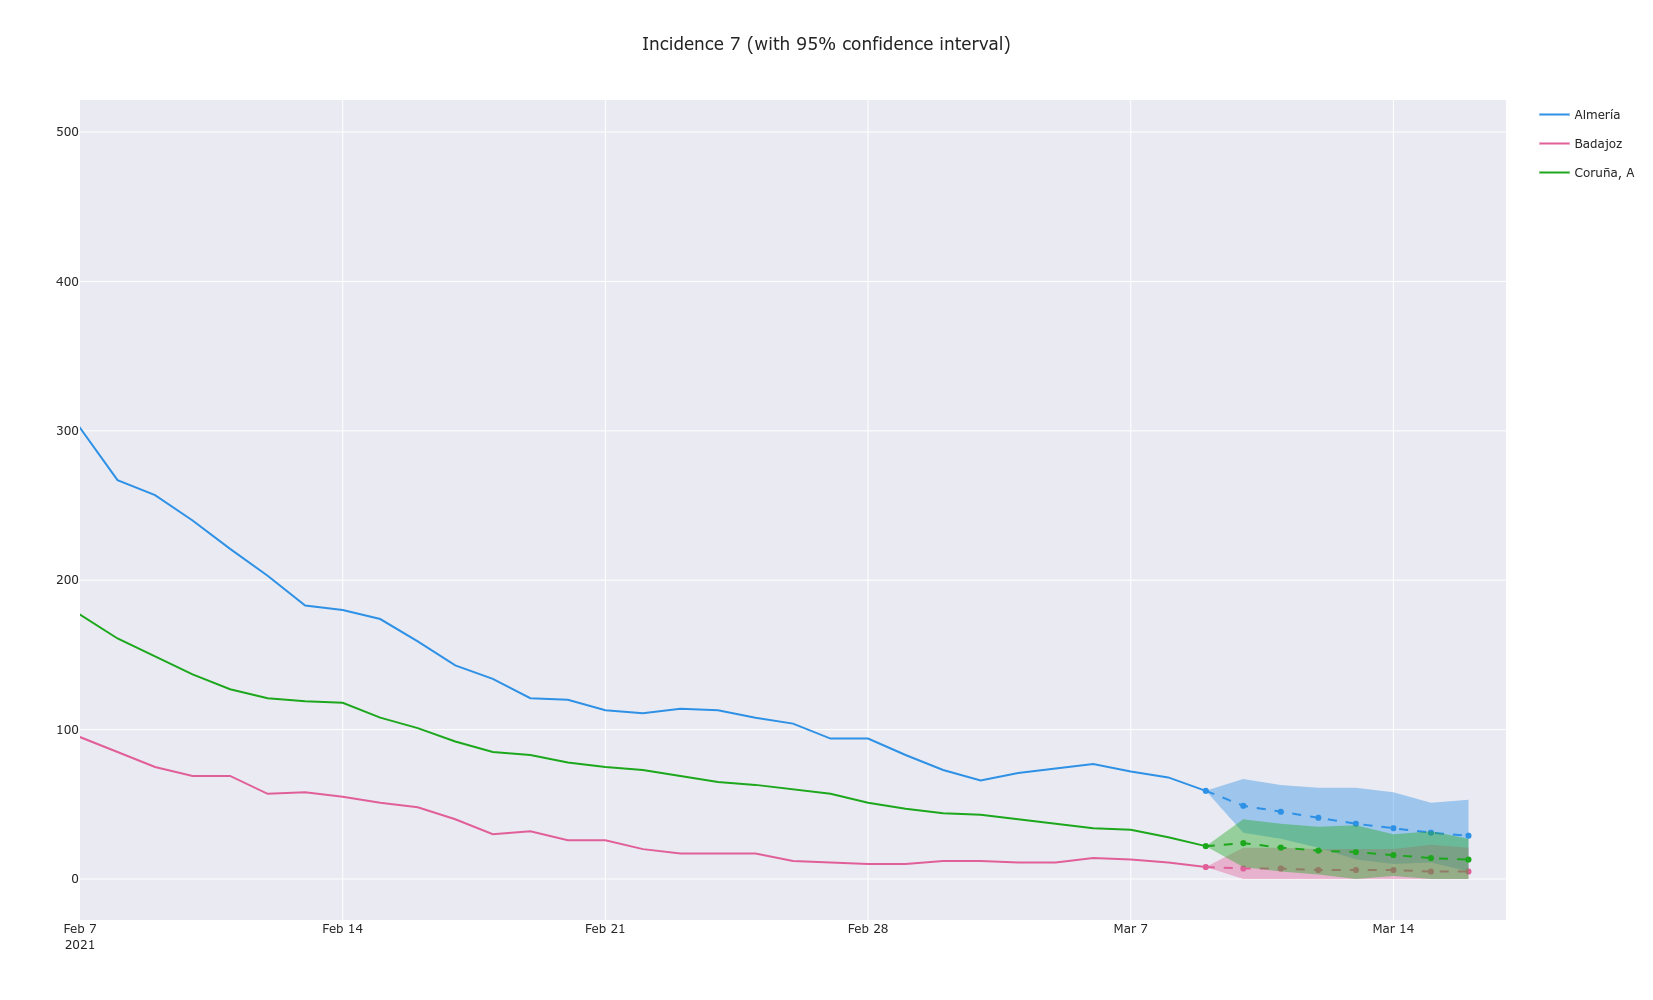

In [9]:
# Plot
provinces = X.index.get_level_values('province').unique()
dates = X.index.get_level_values('date').unique()
start = pd.to_datetime(max(dates)) + pd.DateOffset(days=-30)
dend = pd.to_datetime(max(dates)) + pd.DateOffset(days=8)

fig = go.Figure(layout={'title': 'Incidence 7 (with 95% confidence interval)',
                        'template': 'seaborn',
                        'hovermode': 'x unified',
                        'height': 1000,
                        'width': 1000,
                        'xaxis': {'range': [start, dend]}})
clist = colors.qualitative.Dark24
provinces = ['Almería', 'Badajoz', 'Coruña, A']
for i, p in enumerate(provinces):

    a = X['incidence 7'].xs(p, level='province')
    b = pred.xs(p, level='province')
    c = colors.hex_to_rgb(clist[i % len(clist)])

    fig.add_trace(go.Scatter(name=p,
                             x=a.index,
                             y=a,
                             line={'color': f'rgb{c}'},
                             legendgroup=p,
                             )
                  )

    mean, std = b['incidence 7 (mean)'], b['incidence 7 (std)']
    drange = a.index[-1:].append(b.index)  # append last true value to predictions for nicer plot

    ub = a[-1:].append(mean + 2 * std)
    lb = a[-1:].append(mean - 2 * std)
    lb = lb.clip(0)  # clip negative values
    mv = a[-1:].append(mean)
    info = [f'{p}: <b>{mv[i]}</b> [{lb[i]} | {ub[i]}]' for i in range(len(mv))]

    fig.add_trace(go.Scatter(name='upper bound',
                             x=drange,
                             y=ub,
                             mode='lines',
                             line={'width': 0},
                             legendgroup=p,
                             showlegend=False,
                             hoverinfo='skip'
                             )
                  )

    fig.add_trace(go.Scatter(name='lower bound',
                             x=drange,
                             y=lb,
                             line={'width': 0},
                             mode='lines',
                             fillcolor=f'rgba{c + (0.4,)}',
                             fill='tonexty',
                             legendgroup=p,
                             showlegend=False,
                             hoverinfo='skip'
                             )
                  )

    fig.add_trace(go.Scatter(name=p,
                             x=drange,
                             y=mv,
                             line={'color': f'rgb{c}',
                                   'dash': 'dash'},
                             legendgroup=p,
                             showlegend=False,
                             hoverinfo='x+text',
                             hovertext=info,
                             )
                  )
fig.show()

In [4]:
# import plotly
# plotly.io.orca.config.executable = '/home/iheredia/src/orca-1.3.1.AppImage'
# plotly.io.orca.config.save()

In [11]:
fig.write_image('figure.png', scale=2)

In [8]:
fig.layout.scene.camera.eye

layout.scene.camera.Eye()